In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider, IntSlider
import imageio.v2 as imageio
from tqdm import tqdm

import sys
from importlib import reload
sys.path.append("../scripts")
import solution as sol
import solution_fpt as fpt
sol = reload(sol)
fpt = reload(fpt)

# Delta Resetting Solution
We want to check if the solution imprelementation is correct

In [71]:
bins = 50

def plot_dist(m0,r,t):    
    plt.figure(figsize=(7,4))
    plt.ylim(0, 4)
    s = sol.sol(1000,r,m0,bins,t)
    plt.scatter(np.linspace(-1,1,bins), s, color = "r")
    plt.title(f"Distribution")
    # plt.legend()
    plt.grid(True)
    print(np.sum(s*2/bins))
    plt.show()

interact(
    plot_dist,
    m0 = FloatSlider(value=0.0, min=-1, max=1, step=0.01, description='m0'),
    r = FloatSlider(value=0.0, min=0, max=0.1, step=0.001, description='r'),
    t = FloatSlider(value=0.0, min=0, max=1000, step=1, description='t')
)

interactive(children=(FloatSlider(value=0.0, description='m0', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_dist(m0, r, t)>

In [35]:
def plot_pi(m0, N):
    r = np.linspace(0, 0.1, 100)
    pim1 = np.array([sol.pim1(N, i, m0) for i in r])
    pip1 = np.array([sol.pip1(N, i, m0) for i in r])

    plt.figure(figsize=(7,4))
    plt.ylim(-0.1, 1.1)
    plt.plot(r, pim1, label='π₀')
    plt.plot(r, pip1, label='π₁')
    plt.plot(r, pip1+pim1, label='π₀ + π₁')
    plt.xlabel("r")
    plt.ylabel("π")
    plt.title(f"π₀(r) and π₁(r)")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(
    plot_pi,
    m0 = FloatSlider(value=0.0, min=-1, max=1, step=0.01, description='m0'),
    N = FloatSlider(value=0.0, min=1, max=1000, step=1, description='N')
)

interactive(children=(FloatSlider(value=0.0, description='m0', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_pi(m0, N)>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


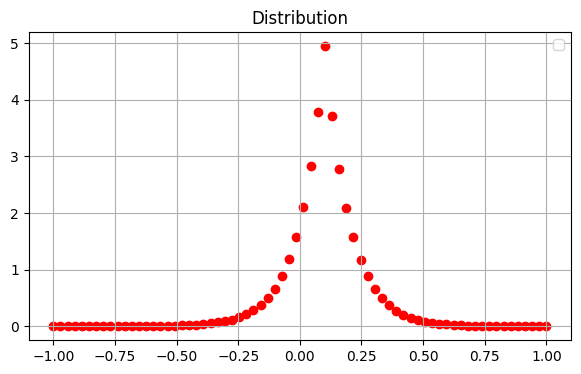

In [63]:
plt.figure(figsize=(7,4))
# plt.ylim(-1, 2)
plt.scatter(np.linspace(-1,1,70), sol.sol(N = 100, r = 1, m0 = 0.1, bins = 70), color = "r") #N, r, m0, bins
plt.title(f"Distribution")
plt.legend()
plt.grid(True)
plt.show()

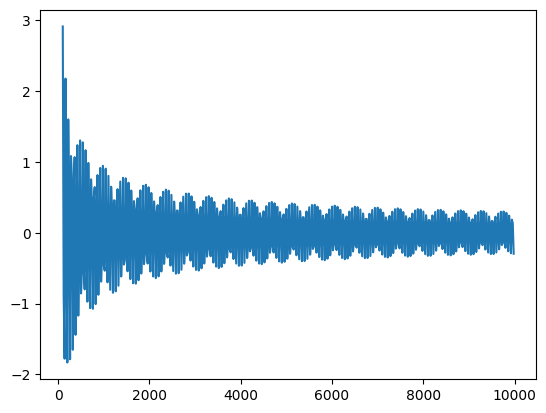

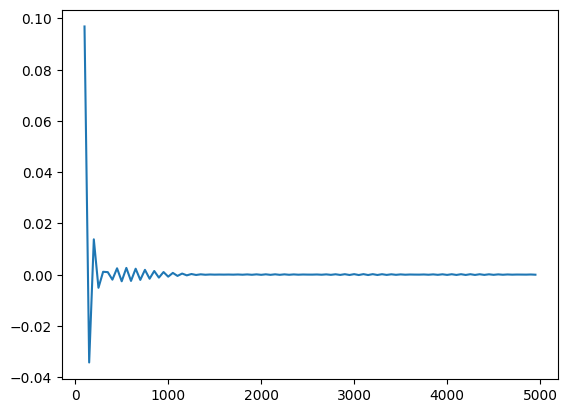

In [49]:
a = []
ms = range(100, 5000, 50)

for M in ms:
    a.append(sol.fk(1000, r = 0.1, m0 = 0.06, m = 1-0.1/bins, t = 100, M = M))

plt.plot(ms, a)

## GIF

In [76]:
def make_gif(
    filename,
    N,
    r,
    m0,
    bins=400,
    t_max=20,
    n_frames=100,
    ylim=None
):
    times = np.linspace(0, t_max, n_frames)
    images = []

    for t in tqdm(times):
        p = sol.sol(N, r, m0, bins, t)

        fig, ax = plt.subplots(figsize=(6,4))
        ax.plot(np.linspace(-1,1,bins), p, lw=2)
        ax.set_xlabel(r"$m$")
        ax.set_ylabel(r"$P(m,t)$")
        ax.set_title(rf"$t = {t:.2f}$")

        if ylim is not None:
            ax.set_ylim(*ylim)

        ax.grid(alpha=0.3)

        # Render to buffer
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)

        plt.close(fig)

    imageio.mimsave(filename, images, fps=12)

In [73]:
make_gif("../figures/theory_anim.gif", 1000, 0.01, 0)

C:\Users\gerar\AppData\Local\Temp\ipykernel_24204\2344039299.py:30: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:44<00:00,  3.44s/it]


In [5]:
print(sol.fk(500,0.1,0.1,-1))
print(np.linspace(-1,1,70))

-0.6844625169835822
[-1.         -0.97101449 -0.94202899 -0.91304348 -0.88405797 -0.85507246
 -0.82608696 -0.79710145 -0.76811594 -0.73913043 -0.71014493 -0.68115942
 -0.65217391 -0.62318841 -0.5942029  -0.56521739 -0.53623188 -0.50724638
 -0.47826087 -0.44927536 -0.42028986 -0.39130435 -0.36231884 -0.33333333
 -0.30434783 -0.27536232 -0.24637681 -0.2173913  -0.1884058  -0.15942029
 -0.13043478 -0.10144928 -0.07246377 -0.04347826 -0.01449275  0.01449275
  0.04347826  0.07246377  0.10144928  0.13043478  0.15942029  0.1884058
  0.2173913   0.24637681  0.27536232  0.30434783  0.33333333  0.36231884
  0.39130435  0.42028986  0.44927536  0.47826087  0.50724638  0.53623188
  0.56521739  0.5942029   0.62318841  0.65217391  0.68115942  0.71014493
  0.73913043  0.76811594  0.79710145  0.82608696  0.85507246  0.88405797
  0.91304348  0.94202899  0.97101449  1.        ]


In [21]:
from scipy.special import eval_gegenbauer
for n in range(300 ):
    print(eval_gegenbauer(n, 1.5, -1))

1.0
-3.0
6.0
-9.999999999999998
14.99999999999999
-20.999999999999975
27.999999999999964
-35.99999999999995
44.99999999999994
-54.999999999999936
65.99999999999993
-77.9999999999999
90.99999999999987
-104.99999999999986
119.99999999999984
-135.99999999999983
152.99999999999977
-170.9999999999997
189.99999999999966
-209.9999999999997
230.99999999999963
-252.99999999999966
275.9999999999997
-299.9999999999997
324.9999999999997
-350.9999999999996
377.9999999999995
-405.99999999999943
434.99999999999943
-464.9999999999996
495.99999999999966
-527.9999999999998
561.0
-595.0000000000006
630.0000000000011
-666.0000000000015
703.0000000000016
-741.0000000000016
780.0000000000017
-820.0000000000015
861.0000000000008
-903.0000000000005
946.0000000000005
-990.0000000000005
1035.0000000000005
-1081.0000000000005
1128.0000000000005
-1176.0000000000005
1225.0000000000005
-1275.0000000000005
1326.0000000000007
-1378.0000000000007
1431.0000000000007
-1485.0000000000007
1540.0000000000007
-1596.00000000

# First Passage Time

In [7]:
def plot_fpt_m0(N,r):
    m0vals = np.linspace(-1,1,21)
    
    ym0_sim = []
    ym0_th = []
    
    for m0 in m0vals:
        ym0_th.append(fpt.mean_fpt(N, m0, r))
 
    plt.figure()
    plt.ylim(0,700)
    plt.title(f"r = {r}")
    plt.xlabel("m0")
    plt.ylabel("MFPT")
        
    plt.plot(m0vals, ym0_th)
    
    plt.show()

interact(
    plot_fpt_m0,
    N = FloatSlider(value=1, min=1, max=1000, step=1, description='N'),
    r = FloatSlider(value=0.0, min=0, max=10, step=0.001, description='r')
)

interactive(children=(FloatSlider(value=1.0, description='N', max=1000.0, min=1.0, step=1.0), FloatSlider(valu…

<function __main__.plot_fpt_m0(N, r)>

In [16]:
def plot_fpt_dist(N,r, m0):
    svals = np.logspace(-3, 0, 50)
    
    fpt_lap = []
    
    for s in svals:
         fpt_lap.append(fpt.dist_laplace(N, m0, r, s))
 
    plt.figure()
    # plt.ylim(0,700)
    # plt.title(f"r = {r}")
    plt.xlabel("s")
    plt.ylabel("p")
        
    plt.plot(svals,  fpt_lap)
    
    plt.show()

interact(
    plot_fpt_dist,
    N = FloatSlider(value=1, min=1, max=1000, step=1, description='N'),
    r = FloatSlider(value=0.0, min=0, max=2, step=0.001, description='r'),
    m0 = FloatSlider(value=0.0, min=-1, max=1, step=0.001, description='m0')
)

interactive(children=(FloatSlider(value=1.0, description='N', max=1000.0, min=1.0, step=1.0), FloatSlider(valu…

<function __main__.plot_fpt_dist(N, r, m0)>

In [ ]:
s_vals = np.logspace(-3, 0, 50)
N = 1000
m0 = 0
r = 0.1
for M in [200, 400, 800, 1600, 3200]:
    # plt.yscale("log")
    plt.xscale("log")
    plt.plot(s_vals, fpt.sol_fpt(N, m0, r, s_vals, M=M), label=f"M={M}")
    plt.axhline(y = 0)
    plt.legend()

# Uniform Resetting

In [7]:
def plot_uniform(N, r, bins):
    plt.ylim(0,2)
    plt.axhline(y = 0.5*r/(2/N+r), color = "r")
    plt.scatter([-1,1], [0.5*(1-r/(2/N+r))/(2/bins), 0.5*(1-r/(2/N+r))/(2/bins)], color = "r")
    plt.show()
    print(r/(2/N+r) + (1-r/(2/N+r)))

interact(
    plot_uniform,
    N = FloatSlider(value=1, min=1, max=1000, step=1, description='N'),
    r = FloatSlider(value=0.0, min=0, max=10, step=0.001, description='r'),
    bins = IntSlider(value=10, min=10, max=100, description='bins')
)

interactive(children=(FloatSlider(value=1.0, description='N', max=1000.0, min=1.0, step=1.0), FloatSlider(valu…

<function __main__.plot_uniform(N, r, bins)>